<a href="https://colab.research.google.com/github/anvithakp/ML-Google-Colab/blob/master/Gaussian_Mixtures_3D_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/My Drive/Data/kc_house_data.csv"
data = pd.read_csv(path)

Here we have the various house details like Price,Living Area size,No.of bedroooms, Year built etc. Now, we have to segment the houses based on the following features. The aim is to determine the house pricing based on the clusters.

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

Removing rows with Non numeric values, if any

In [ ]:
data = data.dropna()
data = data.reset_index(drop=True)
sample_data = data.sample(1000)

To get a better understanding of the house price and how the features in the dataset will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In the code block below, I have added the indices of choice to the indices list which will represent the house price to track. Here I have tried different sets of features and performing GMM clustering until obtaining clusters that vary significant from one another.

In [ ]:
# Living area vs House Price
new_data1 = data[["sqft_living","price"]]

#No.of Bedrooms vs House Price
new_data2 = data.iloc[:, [3, 2]].values

#Zipcode vs House Price
new_data3 = data.iloc[:, [16, 2]].values

#Year Built vs House Price
new_data4 = data.iloc[:, [14, 2]].values

#Latitude,Longitude vs House Price
new_data5 = data.iloc[:, [17,18,2]].values
#with smaller sample_data for better understanding of GMM
sample = sample_data.iloc[:, [17,18,2]].values


Now, we are standardizing and scaling the Living Area and House Price data due to a huge difference in the magnitudes

In [ ]:
new_data1.describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(new_data1)

# Pair Plotting

 Pair plotting allows us to see both distribution of a single feature and relationships between two features 

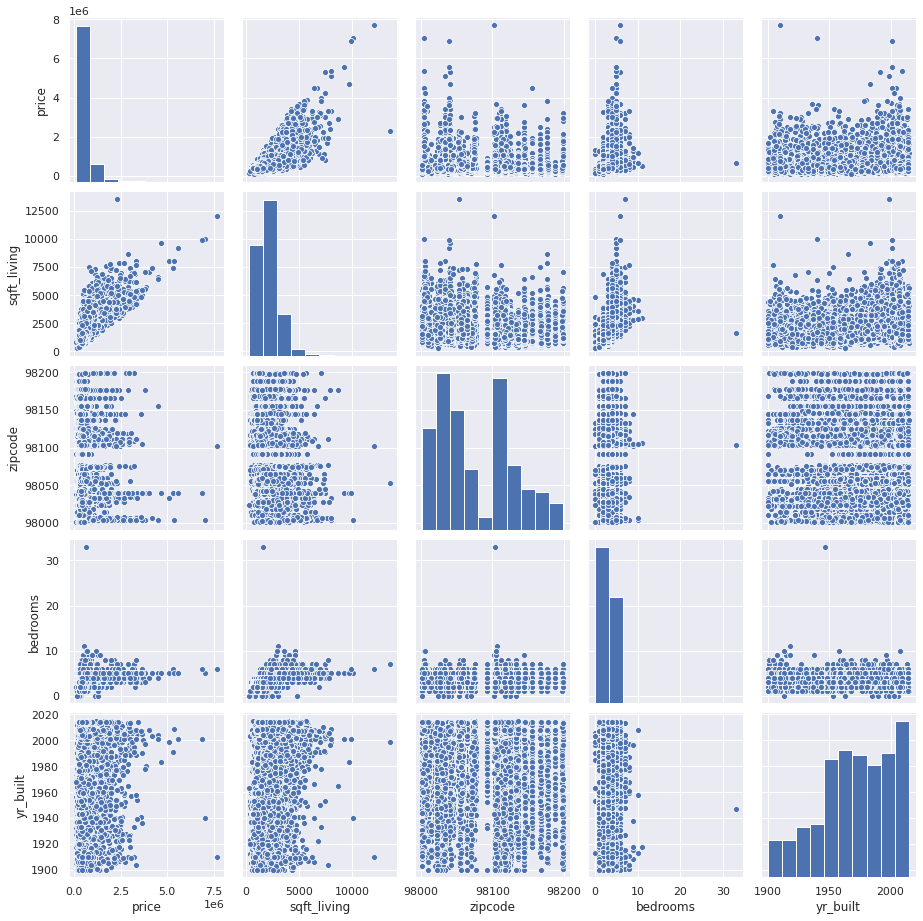

In [ ]:
sns.set()
cols = ['price', 'sqft_living', 'zipcode', 'bedrooms', 'yr_built']
sns.pairplot(data[cols], height = 2.5)
plt.show();


The **scatter plots** show us the relationship between the features and these upper and lower triangles are the mirror image of each other.

The **diagonal plot** which showcases the histogram which allows us to see the Probability distribution of a single feature

# Finding the optimal number of Components to use in GMM using **Akaike information criterion** **(AIC)** and  **Bayesian information criterion** **(BIC)**

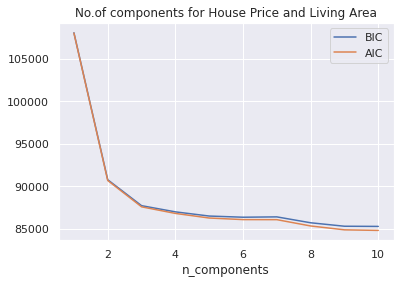

In [ ]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(scaled_data1)
          for n in n_components]

plt.plot(n_components, [m.bic(scaled_data1) for m in models], label='BIC')
plt.plot(n_components, [m.aic(scaled_data1) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('No.of components for House Price and Living Area')
plt.xlabel('n_components');

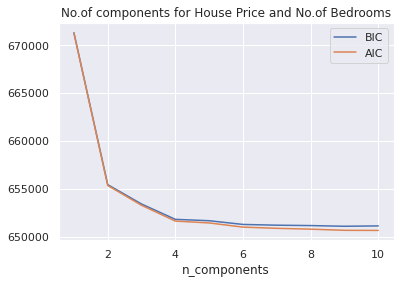

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(new_data2)
          for n in n_components]

plt.plot(n_components, [m.bic(new_data2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(new_data2) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('No.of components for House Price and No.of Bedrooms')
plt.xlabel('n_components');

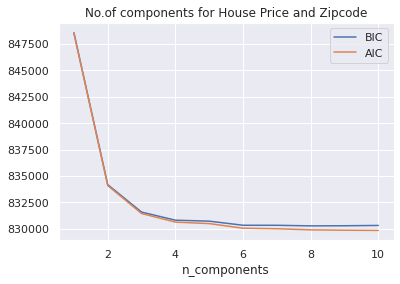

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(new_data3)
          for n in n_components]

plt.plot(n_components, [m.bic(new_data3) for m in models], label='BIC')
plt.plot(n_components, [m.aic(new_data3) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('No.of components for House Price and Zipcode')
plt.xlabel('n_components');

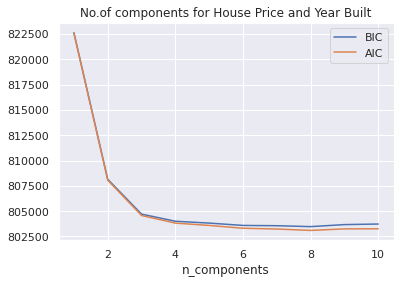

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(new_data4)
          for n in n_components]

plt.plot(n_components, [m.bic(new_data4) for m in models], label='BIC')
plt.plot(n_components, [m.aic(new_data4) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('No.of components for House Price and Year Built')
plt.xlabel('n_components');

# Plotting the data

3D scatter plot performing GMM clustering on House Price, Latitude and Longitude

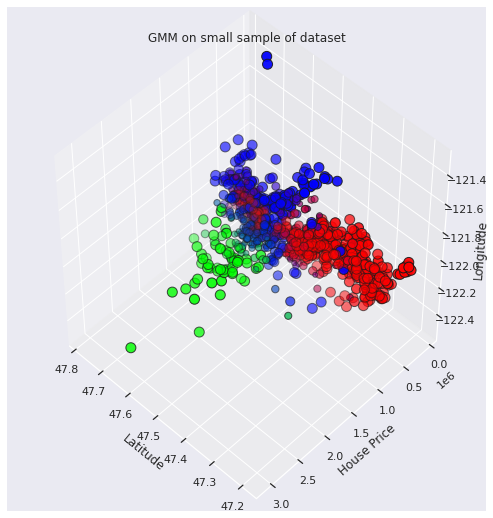

In [ ]:
sample_gmm = GaussianMixture(n_components=3)
#plotting a sample of 1000 datapoints to visualize the probability of datapoints more clearly
sample_gmm.fit(sample)
proba = sample_gmm.predict_proba(sample)

colored_arrays = np.matrix(proba)
size = 100 * proba.max(1) ** 2
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(sample[:, 0], sample[:, 2], sample[:, 1], c=colored_arrays,
          cmap='rainbow', edgecolor="k", s=)
ax.set_xlabel("Latitude")
ax.set_ylabel("House Price")
ax.set_zlabel("Longitude")
plt.title('GMM on small sample of dataset')
plt.show()

Since we have used the GMM clustering, the probablities that a datapoint belongs to a cluster is used to determine the size of the datapoint of plotting,enabling us to visualize the data more clearly.

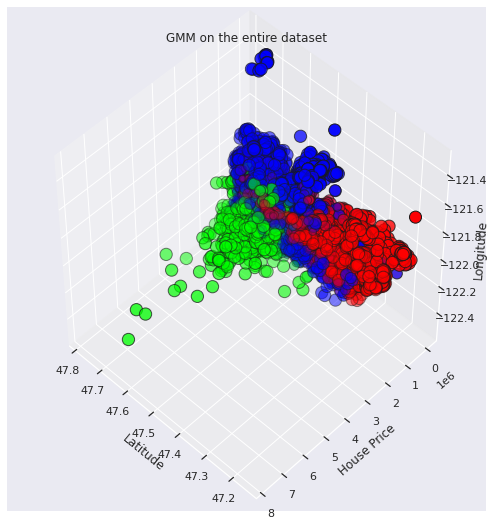

In [ ]:
gmm5 = GaussianMixture(n_components=3)
gmm5.fit(new_data5)
proba5 = gmm5.predict_proba(new_data5)

colored_arrays = np.matrix(proba5)
size = 150 * proba5.max(1) ** 2
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(new_data5[:, 0], new_data5[:, 2], new_data5[:, 1], c=colored_arrays,
          cmap='rainbow', edgecolor="k", s=size)
ax.set_xlabel("Latitude")
ax.set_ylabel("House Price")
ax.set_zlabel("Longitude")
plt.title('GMM on the entire dataset')
plt.show()

The following function helps to visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None,facecolor='black', **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, facecolor=facecolor, **kwargs))
        
def plot_gmm(gmm, X, xlabel, ylabel,  label=True, ax=None,):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='plasma', zorder=2, marker = '.')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, marker = '.')
    ax.axis('auto')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Performing GMM clustering on other important features (like Living area size,no.of bedrooms, yearbuilt, zipcode) Vs Price to acheive more clarity in deciding the important feature for price prediction

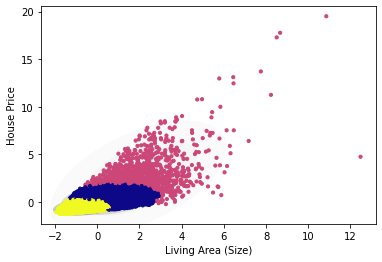

In [ ]:

gmm1 = GaussianMixture(n_components=3).fit(scaled_data1)
labels = gmm1.predict(scaled_data1)
gmm1 = GaussianMixture(n_components=3, covariance_type='full', random_state=2)
xlabel = 'Living Area (Size)'
ylabel = 'House Price'
plot_gmm(gmm1, scaled_data1,xlabel,ylabel)

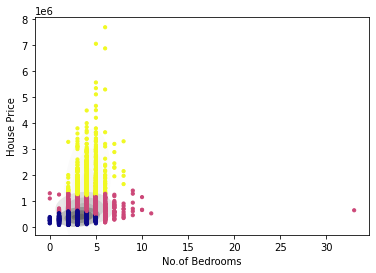

In [ ]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=3).fit(new_data2)
labels = gmm2.predict(new_data2)
gmm2 = GaussianMixture(n_components=3, covariance_type='full', random_state=2)
xlabel = 'No.of Bedrooms'
ylabel = 'House Price'
plot_gmm(gmm2, new_data2,xlabel,ylabel)

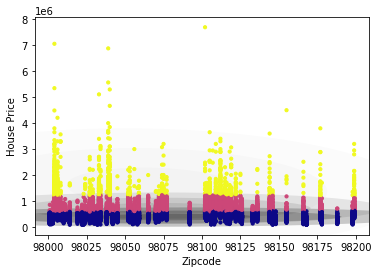

In [ ]:

gmm3 = GaussianMixture(n_components=3).fit(new_data3)
labels = gmm1.predict(new_data3)
gmm3 = GaussianMixture(n_components=3, covariance_type='full', random_state=2)
xlabel = 'Zipcode'
ylabel = 'House Price'
plot_gmm(gmm3, new_data3,xlabel,ylabel)

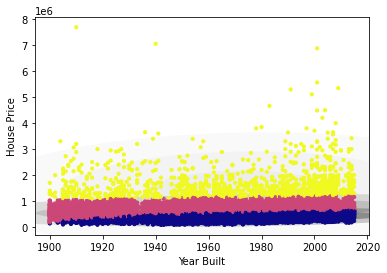

In [ ]:
from sklearn.mixture import GaussianMixture
gmm4 = GaussianMixture(n_components=3).fit(new_data4)
labels = gmm4.predict(new_data4)
gmm4 = GaussianMixture(n_components=3, covariance_type='full', random_state=2)
xlabel = 'Year Built'
ylabel = 'House Price'
plot_gmm(gmm4, new_data4,xlabel,ylabel)

# Data Narrative
From the above graphs we can clearly visualize the clusters. 

We can see that big Living areas ,no.of bedrooms(>2.5) have resulted in high house price. 

Zipcodes from 98000 to 98230 are showing more datapoints with higher price values.

Whereas, the age of the house hasnt been a supporting feature to determine a useful cluster.



 
